# Definição das funções

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def funcion1(x,y1,y2): #f1
    return y2
    # return x*y1 + 2

def funcion2(x,y1,y2): #f2
    return 1-x*y1



# Euler Explicito e outros

In [33]:
def sistema_euler(x,y1,h,x_final,escolha,y2=0):
  lista_x = []
  lista_y1 = []
  lista_f1 = []


  if escolha == 1:
    while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)

        f = funcion1(x, y1,y2)
        print(f"f = f1({x,round(y1,4)}) = {funcion1(x,y1,y2):.4f}")


        lista_f1.append(f)
        print(f"y1 = {round(y1,4)} + {h}*{round(f,4)} = {round(y1 + h*f,4)}")
        print()
        t = y1 + h*f
        x += h
        y1 = t


    # Criando um DataFrame com os dados
    dados = {"x": lista_x, "y": lista_y1, "f": lista_f1}
    df = pd.DataFrame(dados)


    plt.figure("Gráfico - Método de Euler")
    plt.plot(lista_x, lista_y1, 'bo-', label='Aproximação de Euler')
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico usando o método de Euler explicito")
    plt.legend()
    plt.grid()
    display(df)
    plt.show()



  if escolha == 2:
    lista_y2 = []
    lista_f2 = []

    while x <= x_final:
        print("--------------------------------------------------------")
        f1 = funcion1(x,y1,y2)
        lista_f1.append(f1)

        print(f"f1 = f1({x,round(y1,4),round(y2,4)}) = {funcion1(x,y1,y2):.4f}")


        f2 = funcion2(x,y1,y2)
        print(f"f2 = f2({x,round(y1,4),round(y2,4)}) = {funcion2(x,y1,y2):.4f}")
        print()

        lista_f2.append(f2)
        lista_x.append(x)
        lista_y1.append(y1)
        lista_y2.append(y2)

        print(f"y1 = {round(y1,4)} + {h}*{round(f1,4)} = {round(y1 + h*f1,4)}")

        print(f"y2 = {round(y2,4)} + {h}*{round(f2,4)} = {round(y2 + h*f2,4)}")
        print()
        t1 = y1 + h*f1
        t2 = y2 + h*f2
        x += h
        y1 = t1
        y2 = t2
    dados = {"x": lista_x, "y1": lista_y1, "y2": lista_y2, "f1": lista_f1, "f2": lista_f2}
    df = pd.DataFrame(dados)


    plt.figure("Gráfico usando o método de Euler explicito")
    plt.plot(lista_x, lista_y1, 'b-', label='Aproximação de Euler para y1')
    plt.plot(lista_x, lista_y2, 'r-', label='Aproximação de Euler para y2')
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico usando o método de Euler")
    plt.legend()
    plt.grid()
    display(df)
    plt.show()



## Euler modificado (Implementei para ajudar nos estudos, mas pode ignorar)

In [44]:
def euler_modificado(x,y1,h,x_final,escolha,y2 = 0):
  lista_x = []
  lista_y1 = []
  lista_k11 = []
  lista_k21 = []
  if escolha == 1:
     while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)

        k11 = funcion1(x,y1,y2)
        print(f"k11 = f1({x,round(y1,4)}) = {funcion1(x,y1,y2):.4f}")

        lista_k11.append(k11)

        k21 = funcion1(x + h/2, y1 + h*k11/2, y2)
        print(f"k21 = f1({round(x + h/2,4), round(y1 + h*k11/2,4)} = {funcion1(x + h/2, y1 + h*k11/2, y2):.4f}")
        lista_k21.append(k21)

        print()
        print(f"y1 = {round(y1,4)} + {h}*{round(k21,4)} = {round(y1 + h*k21,4)}")
        print()
        y1 = y1 + h*k21
        x += h
     dados = {"x": lista_x, "k1": lista_k11, "k2": lista_k21, "y1": lista_y1}
     df = pd.DataFrame(dados)


     plt.figure("Gráfico - Método de Euler modificado")  # Nome da janela
     plt.plot(lista_x, lista_y1, 'b-', label='Euler modificado para y1')
     plt.xlabel("Eixo X")
     plt.ylabel("Eixo Y")
     plt.title("Gráfico usando o método de Euler")
     plt.legend()
     plt.grid()
     display(df)
     plt.show()  # Mantém a execução aberta para exibir a tabela depois

  elif escolha == 2:
    lista_k12 = []
    lista_y2 = []
    lista_k22 = []
    while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)
        lista_y2.append(y2)


        k11 = funcion1(x,y1,y2)
        print(f"k11 = f1({x,round(y1,4),round(y2,4)}) =  {funcion1(x,y1,y2):.4f}")

        k12 = funcion2(x,y1,y2)
        print(f"k12 = f2({x,round(y1,4),round(y2,4)}) = {funcion2(x,y1,y2):.4f}")

        lista_k11.append(k11)
        lista_k12.append(k12)

        k21 = funcion1(x + h/2, y1 + h*k11/2, y2 + h*k12/2)
        print(f"k21 = f1({round(x + h/2,4), round(y1 + h*k11/2,4), round(y2 + h*k12/2,4)} = {funcion1(x + h/2, y1 + h*k11/2, y2 + h*k12/2):.4f}")

        k22 = funcion2(x + h/2, y1 + h*k11/2, y2 + h*k12/2)
        print(f"k22 = f2({round(x + h/2,4), round(y1 + h*k11/2,4), round(y2 + h*k12/2,4)} ={funcion2(x + h/2, y1 + h*k11/2, y2 + h*k12/2):.4f}")

        lista_k21.append(k21)
        lista_k22.append(k22)
        print()
        print(f"y1 = {round(y1,4)} + {h}*{round(k21,4)} = {round(y1 + h*k21,4)}")
        y1 = y1 + h*k21
        print(f"y2 = {round(y2,4)} + {h}*{round(k22,4)} = {round(y2 + h*k22,4)}")
        print()
        y2 = y2 + h*k22
        x += h
    dados = {"x": lista_x, "k11": lista_k11, "k21": lista_k21, "k12" :lista_k12 , "k22" : lista_k22, "y1": lista_y1, "y2": lista_y2}




    df = pd.DataFrame(dados)


    plt.figure("Gráfico - Método de Euler modificado")  # Nome da janela
    plt.plot(lista_x, lista_y1, 'b-', label='Euler modificado para y1')



    plt.plot(lista_x, lista_y2, 'r-', label='Euler modificado para y2')
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico usando o método de Euler")
    plt.legend()
    plt.grid()
    display(df)
    plt.show()  # Mantém a execução aberta para exibir a tabela depois


## Euler melhorado (Implementei para ajudar nos estudos, mas pode ignorar)

In [46]:
def euler_melhorado(x,y1,h,x_final,escolha,y2 = 0):
  # print("i ||  x    ||   y1    ||   y2    ||   f1    ||   f2    ||")
  lista_x = []
  lista_y1 = []
  lista_k11 = []
  lista_k21 = []
  if escolha == 1:
     while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)

        k11 = funcion1(x,y1,y2)
        print(f"k11 = f1({x,round(y1,4)}) = {funcion1(x,y1,y2):.4f}")

        lista_k11.append(k11)

        k21 = funcion1(x + h, y1 + h*k11, y2)
        print(f"k21 = f1({round(x + h,4), round(y1 + h*k11,4)} = {funcion1(x + h, y1 + h*k11,y2)}")


        lista_k21.append(k21)
        print()
        print(f"y1 = {round(y1,4)} + {h}/2 *{round(k21,4)} = {round(y1 + h*k21,4)}")
        y1 = y1 + h/2*(k21+k11)
        print()

        x += h
     dados = {"x": lista_x, "y1": lista_y1, "k1": lista_k11, "k2": lista_k21}
     df = pd.DataFrame(dados)


     plt.figure("Gráfico - Método de Euler melhorado")  # Nome da janela
     plt.plot(lista_x, lista_y1, 'b-', label='Euler melhorado para y1')
     plt.xlabel("Eixo X")
     plt.ylabel("Eixo Y")
     plt.title("Gráfico usando o método de Euler")
     plt.legend()
     plt.grid()
     display(df)
     plt.show()  # Mantém a execução aberta para exibir a tabela depois

  elif escolha == 2:
    lista_k12 = []
    lista_y2 = []
    lista_k22 = []
    while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)
        lista_y2.append(y2)

        k11 = funcion1(x,y1,y2)
        print(f"k11 = f1({x,round(y1,4),round(y2,4)}) = {funcion1(x,y1,y2):.4f} ")

        k12 = funcion2(x,y1,y2)
        print(f"k12 = f2({x,round(y1,4),round(y2,4)}) = {funcion2(x,y1,y2):.4f}")

        lista_k11.append(k11)
        lista_k12.append(k12)

        k21 = funcion1(x + h, y1 + h*k11, y2 + h*k12)
        print(f"k21 = f1({round(x + h,4), round(y1 + h*k11,4), round(y2 + h*k12,4)} = {funcion1(x + h, y1 + h*k11, y2 + h*k12):.4f}")


        k22 = funcion2(x + h, y1 + h*k11, y2 + h*k12)
        print(f"k22 = f2({round(x + h,4), round(y1 + h*k11,4), round(y2 + h*k12,4)} = {funcion2(x + h, y1 + h*k11, y2 + h*k12):.4f}")


        lista_k21.append(k21)
        lista_k22.append(k22)
        print()
        print(f"y1 = {round(y1,4)} + {h}/2 *{round(k21,4)} = {round(y1 + h/2*(k21+k11),4)}")
        y1 = y1 + h/2*(k21+k11)

        print(f"y2 = {round(y2,4)} + {h}/2 *{round(k22,4)} = {round(y2 + h/2*(k22+k12),4)}")
        print()
        y2 = y2 + h/2*(k22 + k12)

        x += h
    dados = {"x": lista_x, "k11": lista_k11, "k21": lista_k21, "k12" :lista_k12 , "k22" : lista_k22, "y1": lista_y1, "y2": lista_y2}




    df = pd.DataFrame(dados)


    plt.figure("Gráfico - Método de Euler melhorado")  # Nome da janela
    plt.plot(lista_x, lista_y1, 'b-', label='Euler melhorado para y1')
    plt.plot(lista_x, lista_y2, 'r-', label='Euler melhorado para y2')
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico usando o método de Euler")
    plt.legend()
    plt.grid()
    display(df)
    plt.show()  # Mantém a execução aberta para exibir a tabela depois


#Runge Kutta 4 ordem

In [36]:
def sistema_runge_kutta_4(x, y1, h, x_final, escolha, y2 = 0):
    lista_x = []
    lista_y1 = []
    lista_k11 = []
    lista_k21 = []
    lista_k31 = []
    lista_k41 = []



    if escolha == 1:
      while x <= x_final:
          print("--------------------------------------------------------")
          lista_x.append(x)
          lista_y1.append(y1)

          k1 = funcion1(x, y1,y2)
          lista_k11.append(k1)
          print(f"k1 = f1({x,round(y1,4)}) = {funcion1(x,y1,y2):.4f} ")

          k2 = funcion1(x + h/2, y1 + k1/2*h,y2)
          print(f"k2 = f1({round(x + h/2,4), round(y1 + k1/2*h,4)}) = {funcion1(x + h/2, y1,y2):.4f}")
          lista_k21.append(k2)

          k3 = funcion1(x + h/2, y1 + k2/2*h,y2)
          print(f"k3 = f1({round(x + h/2,4), round(y1 + k2/2*h,4)}) = {funcion1(x + h/2, y1,y2):.4f}")
          lista_k31.append(k3)

          k4 = funcion1(x + h, y1 + k3*h,y2)
          print(f"k4 = f1({round(x + h,4), round(y1 + k3*h,4)}) = {funcion1(x + h, y1,y2):.4f}")
          lista_k41.append(k4)
          print()
          print(f"y1 = {round(y1,4)} + {h}/6 *({round(k1,4)} + 2*{round(k2,4)} + 2*{round(k3,4)} + {round(k4,4)}) = {round(y1 + (h/6) * (k1 + 2*k2 + 2*k3 + k4),4)}")
          y1 = y1 + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
          print()
          x += h

      dados = {"x": lista_x,"k11": lista_k11, "k21": lista_k21, "k31" : lista_k31,  "k41" : lista_k41,  "y1": lista_y1}
      df = pd.DataFrame(dados)

      plt.figure("Gráfico - Método de Runge-Kutta de 4ª ordem")
      plt.plot(lista_x, lista_y1, 'bo-', label='Aproximação de RK4')
      plt.xlabel("Eixo X")
      plt.ylabel("Eixo Y")
      plt.title("Gráfico usando o método de Runge-Kutta de 4ª ordem")
      plt.legend()
      plt.grid()
      display(df)
      plt.show()

    elif escolha == 2:
      lista_y2 = []
      lista_k12 = []
      lista_k22 = []
      lista_k32 = []
      lista_k42 = []
      while x <= x_final:
          print("--------------------------------------------------------")
          lista_x.append(x)
          lista_y1.append(y1)
          lista_y2.append(y2)


          k1_y1 =  funcion1(x, y1, y2)
          k1_y2 =  funcion2(x, y1, y2)
          print(f"k1_y1 = f1({x,round(y1,4),round(y2,4)}) = {funcion1(x,y1,y2):.4f} ")
          print(f"k1_y2 = f2({x,round(y1,4),round(y2,4)}) = {funcion2(x,y1,y2):.4f}")


          lista_k11.append(k1_y1)
          lista_k12.append(k1_y2)

          k2_y1 =  funcion1(x + h/2, y1 + h*k1_y1/2, y2 + h*k1_y2/2)
          k2_y2 =  funcion2(x + h/2, y1 + h*k1_y1/2, y2 + h*k1_y2/2)
          print(f"k2_y1 = f1({round(x + h/2,4), round(y1 + h*k1_y1/2,4), round(y2 + h*k1_y2/2,4)}) = {funcion1(x + h/2, y1 + h*k1_y1/2, y2 + h*k1_y2/2):.4f} ")
          print(f"k2_y2 = f2({round(x + h/2,4), round(y1 + h*k1_y1/2,4), round(y2 + h*k1_y2/2,4)}) = {funcion2(x + h/2, y1 + h*k1_y1/2, y2 + h*k1_y2/2):.4f}")

          lista_k21.append(k2_y1)
          lista_k22.append(k2_y2)



          k3_y1 =  funcion1(x + h/2, y1 + h*k2_y1/2, y2 + h*k2_y2/2)
          k3_y2 =  funcion2(x + h/2, y1 + h*k2_y1/2, y2 + h*k2_y2/2)
          lista_k31.append(k3_y1)
          lista_k32.append(k3_y2)

          print(f"k3_y1 = f1({round(x + h/2,4), round(y1 + h*k2_y1/2,4), round(y2 + h*k2_y2/2,4)}) = {funcion1(x + h/2, y1 + h*k2_y1/2, y2 + h*k2_y2/2):.4f}")
          print(f"k3_y2 = f2({round(x + h/2,4), round(y1 + h*k2_y1/2,4), round(y2 + h*k2_y2/2,4)}) = {funcion2(x + h/2, y1 + h*k2_y1/2, y2 + h*k2_y2/2):.4f}")


          k4_y1 =  funcion1(x + h, y1 + h*k3_y1, y2 + h*k3_y2)
          k4_y2 =  funcion2(x + h, y1 + h*k3_y1, y2 + h*k3_y2)

          print(f"k4_y1 = f1({round(x + h,4), round(y1 + h*k3_y1,4), round(y2 + h*k3_y2,4)}) = {funcion1(x + h, y1 + h*k3_y1, y2 + h*k3_y2):.4f}")
          print(f"k4_y2 = f2({round(x + h,4), round(y1 + h*k3_y1,4), round(y2 + h*k3_y2,4)}) = {funcion2(x + h, y1 + h*k3_y1, y2 + h*k3_y2):.4f}")
          print()
          lista_k41.append(k4_y1)
          lista_k42.append(k4_y2)


          print(f" y1 = {round(y1,4)} + {h}/6 * ({round(k1_y1,4)} + 2*{round(k2_y1,4)} + 2*{round(k3_y1,4)} + {round(k4_y1,4) }) = {round(y1 + (h/6) * (k1_y1 + 2*k2_y1 + 2*k3_y1 + k4_y1),4)}")
          y1 = y1 + (h/6) * (k1_y1 + 2*k2_y1 + 2*k3_y1 + k4_y1)

          print( f" y2 = {round(y2,4)} + {h}/6 * ({round(k1_y2,4)} + 2*{round(k2_y2,4)} + 2*{round(k3_y2,4)} + {round(k4_y2,4)}) = {round(y2 + (h/6) * (k1_y2 + 2*k2_y2 + 2*k3_y2 + k4_y2),4)}")
          y2 = y2 + (h/6) * (k1_y2 + 2*k2_y2 + 2*k3_y2 + k4_y2)
          print()
          x += h

      dados = {"x": lista_x,"k11": lista_k11, "k21": lista_k21, "k31" : lista_k31,  "k41" : lista_k41, "k12": lista_k12, "k22": lista_k22, "k32" : lista_k32,  "k42" : lista_k42,  "y1": lista_y1, "y2": lista_y2}

      df = pd.DataFrame(dados)

      plt.figure("Gráfico - Método de Runge-Kutta de 4ª ordem")
      plt.plot(lista_x, lista_y1, 'b-', label='Aproximação RK4 para y1')
      plt.plot(lista_x, lista_y2, 'r-', label='Aproximação RK4 para y2')
      plt.xlabel("Eixo X")
      plt.ylabel("Eixo Y")
      plt.title("Gráfico usando o método de Runge-Kutta de 4ª ordem")
      plt.legend()
      plt.grid()
      display(df)
      plt.show()


# Menu inicial


Escolha o método:
 1 - Euler explicito 
 2 - Runge-Kutta de 4ª ordem 
 3 - O Euler explicito e o Runge-Kutta 
 4 - Euler modificado 
 5 - Euler melhorado 
 6 - Todos os metodos
Escolha: 6
Quantas funções você irá usar?
 1 - Uma função 
 2 - Duas funções
Escolha: 2
Digite o valor do x inicial: 0
Digite o valor do x final: 1
Digite o valor de h: 0.1
Digite o valor de y1(0.0): 2
Digite o valor de y2(0.0): 1

 Euler Explicito: 

--------------------------------------------------------
f1 = f1((0.0, 2.0, 1.0)) = 1.0000
f2 = f2((0.0, 2.0, 1.0)) = 1.0000

y1 = 2.0 + 0.1*1.0 = 2.1
y2 = 1.0 + 0.1*1.0 = 1.1

--------------------------------------------------------
f1 = f1((0.1, 2.1, 1.1)) = 1.1000
f2 = f2((0.1, 2.1, 1.1)) = 0.7900

y1 = 2.1 + 0.1*1.1 = 2.21
y2 = 1.1 + 0.1*0.79 = 1.179

--------------------------------------------------------
f1 = f1((0.2, 2.21, 1.179)) = 1.1790
f2 = f2((0.2, 2.21, 1.179)) = 0.5580

y1 = 2.21 + 0.1*1.179 = 2.3279
y2 = 1.179 + 0.1*0.558 = 1.2348

-----------------

,x,y1,y2,f1,f2
0,0.0,2.000000,1.000000,1.000000,1.000000
1,0.1,2.100000,1.100000,1.100000,0.790000
2,0.2,2.210000,1.179000,1.179000,0.558000
3,0.3,2.327900,1.234800,1.234800,0.301630
4,0.4,2.451380,1.264963,1.264963,0.019448
5,0.5,2.577876,1.266908,1.266908,-0.288938
6,0.6,2.704567,1.238014,1.238014,-0.622740
7,0.7,2.828368,1.175740,1.175740,-0.979858
8,0.8,2.945942,1.077754,1.077754,-1.356754
9,0.9,3.053718,0.942079,0.942079,-1.748346


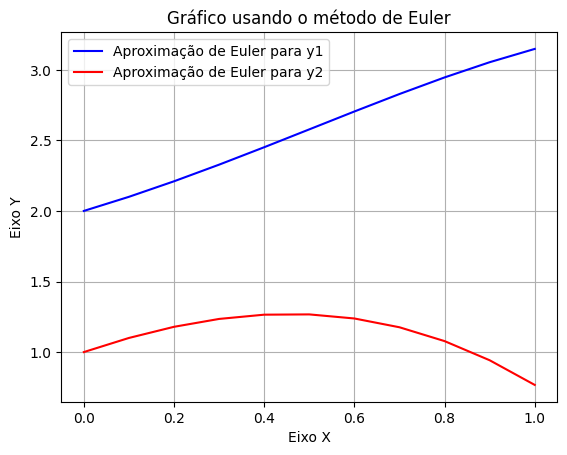


 Runge-Kutta: 

--------------------------------------------------------
k1_y1 = f1((0.0, 2.0, 1.0)) = 1.0000 
k1_y2 = f2((0.0, 2.0, 1.0)) = 1.0000
k2_y1 = f1((0.05, 2.05, 1.05)) = 1.0500 
k2_y2 = f2((0.05, 2.05, 1.05)) = 0.8975
k3_y1 = f1((0.05, 2.0525, 1.0449)) = 1.0449
k3_y2 = f2((0.05, 2.0525, 1.0449)) = 0.8974
k4_y1 = f1((0.1, 2.1045, 1.0897)) = 1.0897
k4_y2 = f2((0.1, 2.1045, 1.0897)) = 0.7896

 y1 = 2.0 + 0.1/6 * (1.0 + 2*1.05 + 2*1.0449 + 1.0897) = 2.1047
 y2 = 1.0 + 0.1/6 * (1.0 + 2*0.8975 + 2*0.8974 + 0.7896) = 1.0897

--------------------------------------------------------
k1_y1 = f1((0.1, 2.1047, 1.0897)) = 1.0897 
k1_y2 = f2((0.1, 2.1047, 1.0897)) = 0.7895
k2_y1 = f1((0.15, 2.1591, 1.1291)) = 1.1291 
k2_y2 = f2((0.15, 2.1591, 1.1291)) = 0.6761
k3_y1 = f1((0.15, 2.1611, 1.1235)) = 1.1235
k3_y2 = f2((0.15, 2.1611, 1.1235)) = 0.6758
k4_y1 = f1((0.2, 2.217, 1.1572)) = 1.1572
k4_y2 = f2((0.2, 2.217, 1.1572)) = 0.5566

 y1 = 2.1047 + 0.1/6 * (1.0897 + 2*1.1291 + 2*1.1235 + 1.1

,x,k11,k21,k31,k41,k12,k22,k32,k42,y1,y2
0,0.0,1.000000,1.050000,1.044875,1.089738,1.000000,0.897500,0.897375,0.789551,2.000000,1.000000
1,0.1,1.089655,1.129132,1.123461,1.157238,0.789534,0.676129,0.675833,0.556599,2.104658,1.089655
2,0.2,1.157156,1.184984,1.178718,1.200245,0.556561,0.431237,0.430890,0.299481,2.217193,1.157156
3,0.3,1.200161,1.215132,1.208243,1.216300,0.299418,0.161652,0.161390,0.017561,2.335273,1.200161
4,0.4,1.216212,1.217085,1.209576,1.202939,0.017469,-0.132712,-0.132731,-0.288642,2.456326,1.216212
5,0.5,1.202844,1.188406,1.180308,1.157812,-0.288767,-0.450722,-0.450325,-0.617339,2.577534,1.202844
6,0.6,1.157708,1.126833,1.118212,1.078816,-0.617501,-0.789919,-0.788915,-0.965360,2.695836,1.157708
7,0.7,1.078699,1.030421,1.021378,0.964239,-0.965562,-1.146411,-1.144600,-1.328067,2.807946,1.078699
8,0.8,0.964105,0.897689,0.888364,0.812906,-1.328311,-1.514804,-1.511982,-1.699302,2.910388,0.964105
9,0.9,0.812752,0.727772,0.718343,0.624338,-1.699586,-1.888169,-1.884132,-2.071374,2.999540,0.812752


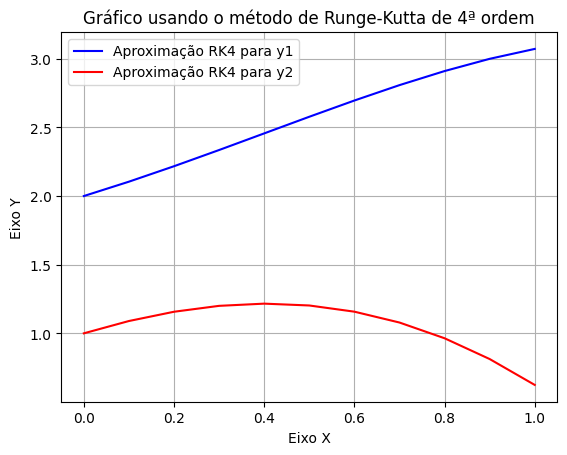


 Euler modificado: 

--------------------------------------------------------
k11 = f1((0.0, 2.0, 1.0)) =  1.0000
k12 = f2((0.0, 2.0, 1.0)) = 1.0000
k21 = f1((0.05, 2.05, 1.05) = 1.0500
k22 = f2((0.05, 2.05, 1.05) =0.8975

y1 = 2.0 + 0.1*1.05 = 2.105
y2 = 1.0 + 0.1*0.8975 = 1.0897

--------------------------------------------------------
k11 = f1((0.1, 2.105, 1.0897)) =  1.0897
k12 = f2((0.1, 2.105, 1.0897)) = 0.7895
k21 = f1((0.15, 2.1595, 1.1292) = 1.1292
k22 = f2((0.15, 2.1595, 1.1292) =0.6761

y1 = 2.105 + 0.1*1.1292 = 2.2179
y2 = 1.0897 + 0.1*0.6761 = 1.1574

--------------------------------------------------------
k11 = f1((0.2, 2.2179, 1.1574)) =  1.1574
k12 = f2((0.2, 2.2179, 1.1574)) = 0.5564
k21 = f1((0.25, 2.2758, 1.1852) = 1.1852
k22 = f2((0.25, 2.2758, 1.1852) =0.4311

y1 = 2.2179 + 0.1*1.1852 = 2.3364
y2 = 1.1574 + 0.1*0.4311 = 1.2005

--------------------------------------------------------
k11 = f1((0.30000000000000004, 2.3364, 1.2005)) =  1.2005
k12 = f2((0.3000000000

,x,k11,k21,k12,k22,y1,y2
0,0.0,1.000000,1.050000,1.000000,0.897500,2.000000,1.000000
1,0.1,1.089750,1.129225,0.789500,0.676077,2.105000,1.089750
2,0.2,1.157358,1.185178,0.556415,0.431052,2.217922,1.157358
3,0.3,1.200463,1.215416,0.299068,0.161238,2.336440,1.200463
4,0.4,1.216587,1.217427,0.016807,-0.133465,2.457982,1.216587
5,0.5,1.203240,1.188747,-0.289862,-0.451938,2.579725,1.203240
6,0.6,1.158046,1.127088,-0.619160,-0.791726,2.698599,1.158046
7,0.7,1.078874,1.030478,-0.967916,-1.148939,2.811308,1.078874
8,0.8,0.963980,0.897406,-1.331485,-1.518172,2.914356,0.963980
9,0.9,0.812163,0.726978,-1.703687,-1.892470,3.004097,0.812163


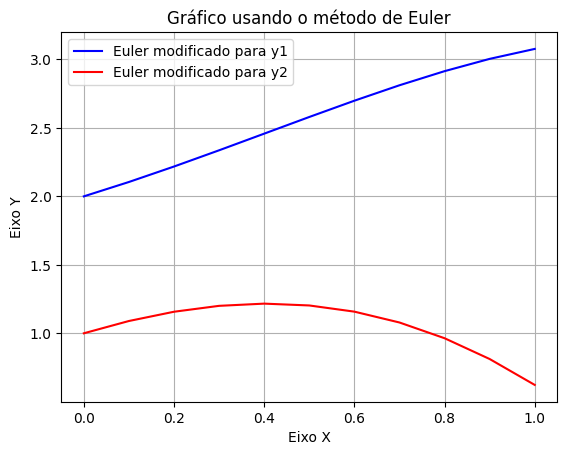


 Euler melhorado: 

--------------------------------------------------------
k11 = f1((0.0, 2.0, 1.0)) = 1.0000 
k12 = f2((0.0, 2.0, 1.0)) = 1.0000
k21 = f1((0.1, 2.1, 1.1) = 1.1000
k22 = f2((0.1, 2.1, 1.1) = 0.7900

y1 = 2.0 + 0.1/2 *1.1 = 2.105
y2 = 1.0 + 0.1/2 *0.79 = 1.0895

--------------------------------------------------------
k11 = f1((0.1, 2.105, 1.0895)) = 1.0895 
k12 = f2((0.1, 2.105, 1.0895)) = 0.7895
k21 = f1((0.2, 2.214, 1.1684) = 1.1684
k22 = f2((0.2, 2.214, 1.1684) = 0.5572

y1 = 2.105 + 0.1/2 *1.1684 = 2.2179
y2 = 1.0895 + 0.1/2 *0.5572 = 1.1568

--------------------------------------------------------
k11 = f1((0.2, 2.2179, 1.1568)) = 1.1568 
k12 = f2((0.2, 2.2179, 1.1568)) = 0.5564
k21 = f1((0.3, 2.3336, 1.2125) = 1.2125
k22 = f2((0.3, 2.3336, 1.2125) = 0.2999

y1 = 2.2179 + 0.1/2 *1.2125 = 2.3364
y2 = 1.1568 + 0.1/2 *0.2999 = 1.1997

--------------------------------------------------------
k11 = f1((0.30000000000000004, 2.3364, 1.1997)) = 1.1997 
k12 = f2((0.30000

,x,k11,k21,k12,k22,y1,y2
0,0.0,1.000000,1.100000,1.000000,0.790000,2.000000,1.000000
1,0.1,1.089500,1.168450,0.789500,0.557210,2.105000,1.089500
2,0.2,1.156835,1.212478,0.556420,0.299926,2.217897,1.156835
3,0.3,1.199653,1.229562,0.299091,0.017469,2.336363,1.199653
4,0.4,1.215481,1.217168,0.016870,-0.289686,2.457824,1.215481
5,0.5,1.201840,1.172867,-0.289728,-0.619784,2.579456,1.201840
6,0.6,1.156364,1.094473,-0.618915,-0.969680,2.698192,1.156364
7,0.7,1.076935,0.980183,-0.967513,-1.334742,2.810734,1.076935
8,0.8,0.961822,0.828735,-1.330872,-1.708794,2.913589,0.961822
9,0.9,0.809839,0.639558,-1.702806,-2.084101,3.003117,0.809839


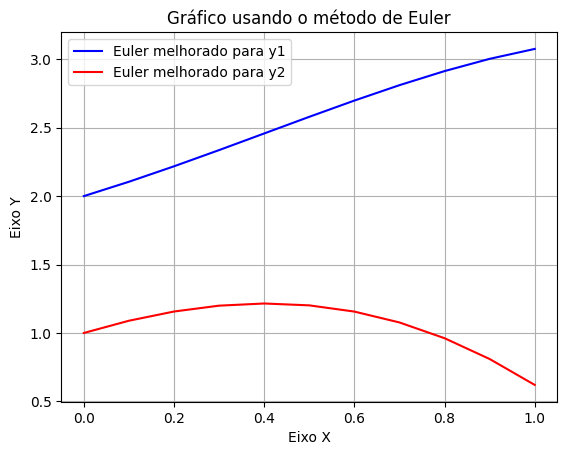

In [64]:
print("Escolha o método:\n 1 - Euler explicito \n 2 - Runge-Kutta de 4ª ordem \n 3 - O Euler explicito e o Runge-Kutta \n 4 - Euler modificado \n 5 - Euler melhorado \n 6 - Todos os metodos")
metodo = int(input("Escolha: "))

print("Quantas funções você irá usar?\n 1 - Uma função \n 2 - Duas funções")
escolha = int(input("Escolha: "))

x = float(input("Digite o valor do x inicial: "))
x_final = float(input("Digite o valor do x final: "))

if(x_final < x):
    print("O valor de x final deve ser maior que o valor de x inicial")
    exit()

h = float(input("Digite o valor de h: "))

if escolha == 1:
    y1 = float(input(f"Digite o valor de y1({x}): "))
    y2 = 0
elif escolha == 2:
    y1 = float(input(f"Digite o valor de y1({x}): "))
    y2 = float(input(f"Digite o valor de y2({x}): "))


if metodo == 1:
        print("Metodo Euler explicito")
        sistema_euler(x, y1,h, x_final,escolha,y2)
elif metodo == 2:
        print("Metodo Runge-Kutta")
        sistema_runge_kutta_4(x, y1, h, x_final,escolha,y2)
elif metodo == 3:
        print("Metodo Euler explicito")
        sistema_euler(x, y1, h, x_final,escolha,y2)
        print("Metodo Runge-Kutta")
        sistema_runge_kutta_4(x, y1, h, x_final,escolha,y2)

elif metodo == 4:
        print("Metodo Euler modificado")
        euler_modificado(x, y1, h, x_final, escolha,y2)

elif metodo == 5:
        print("Metodo Euler melhorado")
        euler_melhorado(x, y1, h, x_final, escolha,y2)
elif metodo == 6:
  print("\n Euler Explicito: \n")
  sistema_euler(x, y1,h, x_final,escolha,y2)
  print("\n Runge-Kutta: \n")
  sistema_runge_kutta_4(x, y1, h, x_final,escolha,y2)
  print("\n Euler modificado: \n")
  euler_modificado(x, y1, h, x_final, escolha,y2)
  print("\n Euler melhorado: \n")
  euler_melhorado(x, y1, h, x_final, escolha,y2)
else:
    print("Nenhum correspondente")

